In [11]:
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


df = pd.read_csv("all_spider_summary.csv")
ofinterest = ["Metepeira labyrinthia", "Latrodectus mactans", "Metazygia wittfeldae", "Anelosimus studiosus"]
dfi = df[df['Specie Name'].isin(ofinterest)] 

In [12]:
def box_plotting(df, variable, family):
    x = df[str(variable)].values
    y = df["Specie Name"]
    plt.figure(figsize = (8,5))
    plot = sns.boxplot(x = x, y = y, data = df)
    plt.title(str(variable) + " distribution", fontsize = 10)
    plt.ylabel(str(family))

In [13]:
def family(row):  #populate Family column 
    if row["Specie Name"] == "Anelosimus studiosus":
        return "Theridiidae Tangle-Web"
    if row["Specie Name"] == "Latrodectus mactans":
        return "Theridiidae Tangle-Web"
    if row["Specie Name"] == "Metepeira labyrinthia":
        return "Araneidae Orb-Weaver"
    if row["Specie Name"] == "Metazygia wittfeldae":
        return "Araneidae Orb-Weaver"
    
dfi['Family'] = dfi.apply (lambda row: family(row), axis=1)
display(dfi)

,Specie Name,Spider ID,Conditions,Is stationary,LombSc period,LombSc amplitude,LombSc p value,Masking,Mean activity onset,DiNoc ratio,Activity Rest ratio,Mean vector lengh,Mean vector angle,Family
70,Anelosimus studiosus,from AWD Spider 1,LD,1,22.729282,6.873429,1.000000e+00,NaN,20:40:00,-1.213115,0.033147,0.641067,-24.887189,Theridiidae Tangle-Web
71,Anelosimus studiosus,from AWD Spider 2,LD,1,24.898841,410.050738,6.170000e-173,NaN,21:37:00,-1.723693,0.097394,0.690610,25.356767,Theridiidae Tangle-Web
72,Anelosimus studiosus,from AWD Spider 3,LD,1,21.623367,8.542467,1.000000e+00,NaN,21:50:00,0.011534,0.049410,0.116699,64.583178,Theridiidae Tangle-Web
73,Anelosimus studiosus,from AWD Spider 4,LD,1,24.392682,20.231817,2.708590e-04,NaN,22:01:00,-1.438763,0.050328,0.637687,75.091543,Theridiidae Tangle-Web
74,Anelosimus studiosus,from AWD Spider 6,LD,1,23.906691,16.370666,1.151284e-02,NaN,22:37:00,-0.864932,0.043932,0.597196,74.059552,Theridiidae Tangle-Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Metepeira labyrinthia,Monitor 13 Spider 12,DD,1,25.449374,1.648452,1.000000e+00,NaN,NaN,NaN,0.296000,0.320877,127.523650,Araneidae Orb-Weaver
754,Metepeira labyrinthia,Monitor 13 Spider 13,DD,1,24.620637,5234.702694,0.000000e+00,NaN,NaN,NaN,0.251569,0.500160,30.052050,Araneidae Orb-Weaver
755,Metepeira labyrinthia,Monitor 13 Spider 14,DD,1,22.469122,90.229769,2.050000e-34,NaN,NaN,NaN,0.049563,0.163885,73.640369,Araneidae Orb-Weaver
756,Metepeira labyrinthia,Monitor 13 Spider 17,DD,1,27.091087,51.024746,1.280000e-17,NaN,NaN,NaN,0.380192,0.034236,124.829694,Araneidae Orb-Weaver


In [4]:
dft = dfi[dfi.Family == "Theridiidae Tangle-Web"]  #tangle-web df
dfa = dfi[dfi.Family == "Araneidae Orb-Weaver"]  #orb-weaver df

In [5]:
def pdandot(df):  
    global dfpd
    dfpd = pd.DataFrame(df["Mean activity onset"].dropna())
    dfpd["Family"] = df["Family"]
    dfpd["Specie Name"] = df["Specie Name"]
    
    xdfpd = []
    ot = []
    for i in dfpd["Mean activity onset"].values:  
        xdfpd.append(pd.to_datetime(i).time())  #convert mean onset to pd.datetime, store as xdfpd
   
    for i in range(len(xdfpd)):
        ot.append(xdfpd[i].hour + xdfpd[i].minute * (1/60))  #convert minute to hour, store as ordinal time (ot)
        
    dfpd["Date-Time Onset"] = xdfpd
    dfpd["Ordinal Onset Time"] = ot

### Within Family- Theridiidae Tangle-Web Comparisons

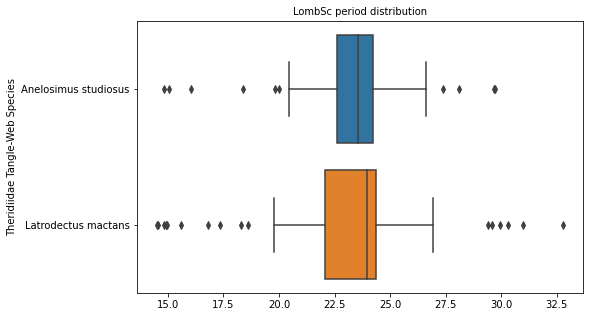

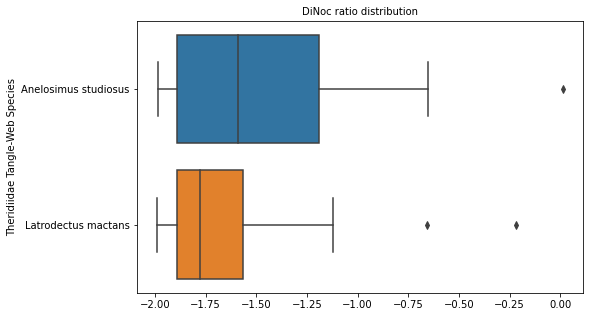

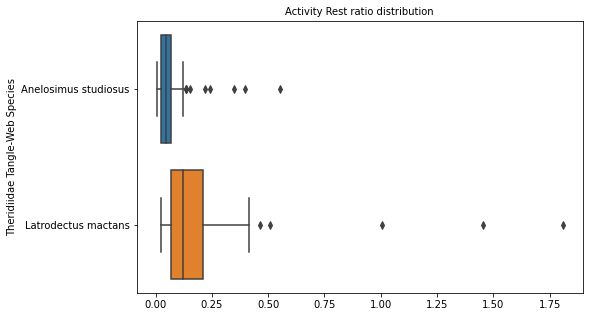

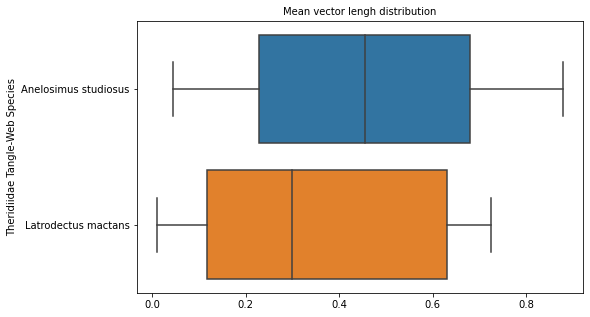

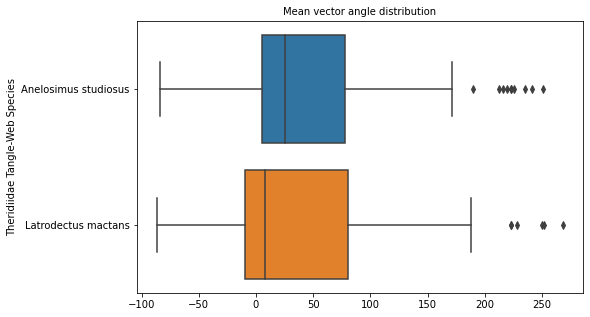

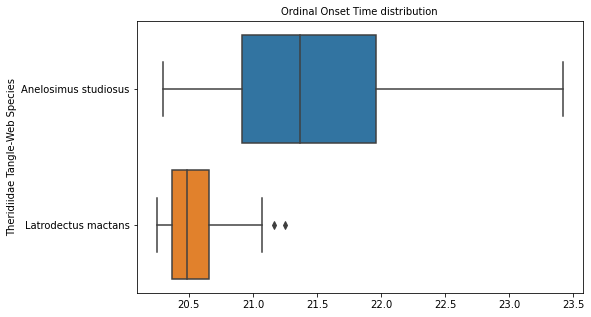

In [6]:
pdandot(dft)
#compare tangle-web spiders
variables = ["LombSc period","DiNoc ratio", "Activity Rest ratio","Mean vector lengh", "Mean vector angle"]
ons = ["Ordinal Onset Time"]
for i in variables:
    box_plotting(dft, str(i), "Theridiidae Tangle-Web Species")
for i in ons:
    box_plotting(dfpd, str(i), "Theridiidae Tangle-Web Species")

##### Notes: 

Lomb Sc period & mean vector angle distribution is similar

Wider distribution of DiNoc in A.studiosus than L.mactans. Significant?
Lots of outliers in L.mactans activity rest ratio. Significant?

What seems to be a huge difference in onset time. interesting find

In [7]:
pdandot(dft)

sumas = dft[dft["Specie Name"] == "Anelosimus studiosus"].describe()
sumas["Mean Onset Time"] = dfpd[dfpd["Specie Name"] == "Anelosimus studiosus"].describe()
sumas = sumas.style.set_table_attributes("style='display:inline'").set_caption('Anelosimus studiosus summary statistics')
display(sumas)


sumlat = dft[dft["Specie Name"] == "Latrodectus mactans"].describe()
sumlat["Mean Onset Time"] = dfpd[dfpd["Specie Name"] == "Latrodectus mactans"].describe()
sumlat = sumlat.style.set_table_attributes("style='display:inline'").set_caption('Latrodectus mactans summary statistics')
display(sumlat)

,Is stationary,LombSc period,LombSc amplitude,LombSc p value,Masking,DiNoc ratio,Activity Rest ratio,Mean vector lengh,Mean vector angle,Mean Onset Time
count,78.000000,78.000000,78.000000,78.000000,0.000000,39.000000,78.000000,78.000000,78.000000,39.000000
mean,1.000000,23.189050,50.022230,0.468705,nan,-1.474182,0.069453,0.450103,51.394258,21.430769
std,0.000000,2.505901,91.768191,0.496194,nan,0.466206,0.086957,0.248843,83.448781,0.719360
min,1.000000,14.827013,0.113447,0.000000,nan,-1.987733,0.006008,0.043423,-83.557538,20.300000
25%,1.000000,22.615095,2.578264,0.000000,nan,-1.892210,0.025312,0.227683,5.562696,20.916667
50%,1.000000,23.577610,15.446465,0.031783,nan,-1.592945,0.045448,0.455103,25.532486,21.366667
75%,1.000000,24.244339,35.581727,1.000000,nan,-1.190226,0.066865,0.679303,77.397309,21.958333
max,1.000000,29.707035,465.005276,1.000000,nan,0.011534,0.552716,0.878471,250.928588,23.416667


,Is stationary,LombSc period,LombSc amplitude,LombSc p value,Masking,DiNoc ratio,Activity Rest ratio,Mean vector lengh,Mean vector angle,Mean Onset Time
count,54.000000,54.000000,54.000000,54.000000,0.000000,27.000000,54.000000,54.000000,54.000000,27.000000
mean,1.000000,23.163273,2988.222148,0.018519,nan,-1.625695,0.217208,0.355171,45.619215,20.555556
std,0.000000,4.200799,5097.856824,0.136083,nan,0.407635,0.322257,0.261702,93.218013,0.262589
min,1.000000,14.507905,4.275112,0.000000,nan,-1.991037,0.026518,0.009892,-86.697744,20.250000
25%,1.000000,22.072006,418.021362,0.000000,nan,-1.890781,0.069909,0.116514,-9.725345,20.366667
50%,1.000000,23.978229,896.777979,0.000000,nan,-1.776795,0.121332,0.299905,7.950001,20.483333
75%,1.000000,24.357644,2726.805606,0.000000,nan,-1.567624,0.210913,0.630223,79.983676,20.658333
max,1.000000,32.762244,29048.295100,1.000000,nan,-0.219059,1.807439,0.725483,268.077945,21.250000


### Within Family- Araneidae Orb-Weaver Comparisons

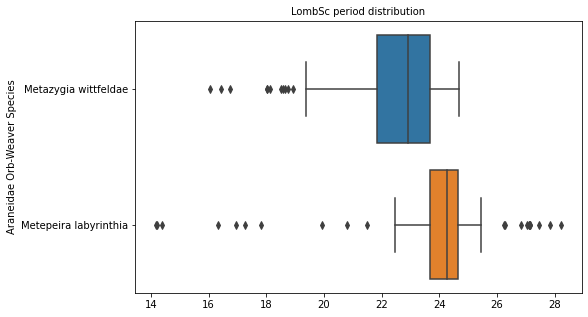

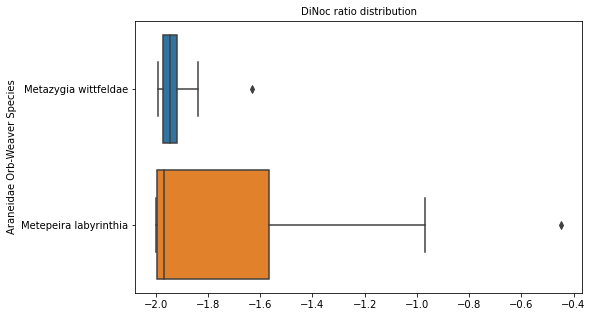

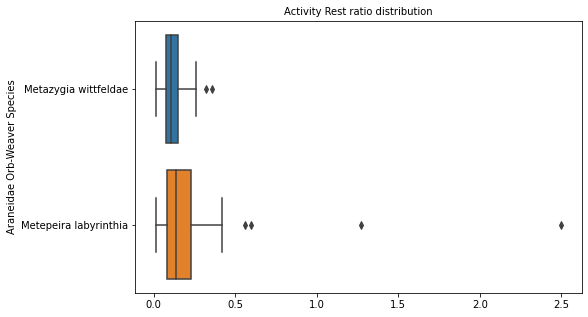

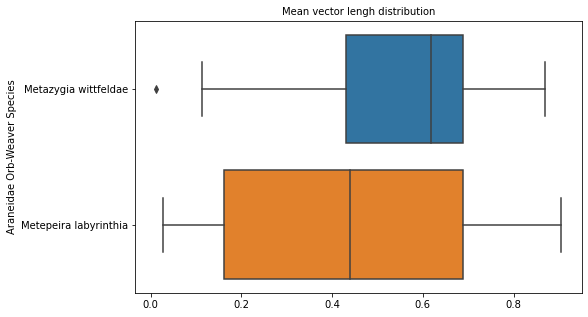

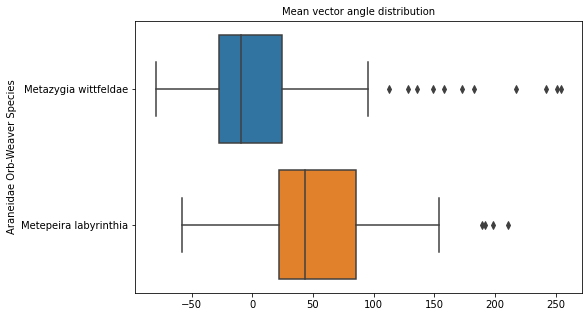

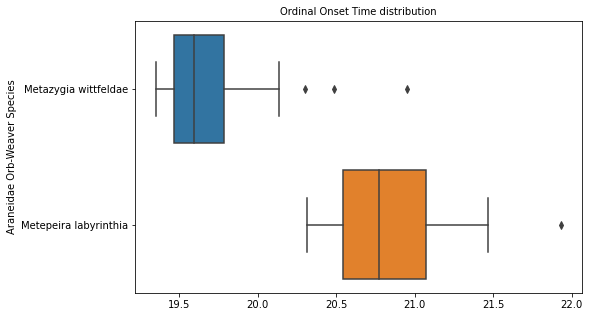

In [8]:
pdandot(dfa)
#compare orb-weaver spiders
variables = ["LombSc period","DiNoc ratio", "Activity Rest ratio","Mean vector lengh", "Mean vector angle"]
ons = ["Ordinal Onset Time"]
for i in variables:
    box_plotting(dfa, str(i), "Araneidae Orb-Weaver Species")
for i in ons:
    box_plotting(dfpd, str(i), "Araneidae Orb-Weaver Species")

##### Notes:

Tons of LombSc period outliers in both. M.labyrinthia median > M.wittfeldae median. Significant?

DiNoc ratio distribution strange for M. labyrinthia. median's similar but IQR = big. Outlier around -.5?

Activity rest ratio is similar.

Mean vector angle & length distri switch is interesting. M. labyrinthia's vector length median < M. wittfeldae's vector length median, but opposite is true for mean vector angle. Significant?

Onset Time has large difference. Significant?

In [9]:
pdandot(dfa)

summet = dfa[dfa["Specie Name"] == "Metepeira labyrinthia"].describe()
summet["Mean Onset Time"] = dfpd[dfpd["Specie Name"] == "Metepeira labyrinthia"].describe()
summet = summet.style.set_table_attributes("style='display:inline'").set_caption('Metepeira labyrinthia summary statistics')

display(summet)


summet = dfa[dfa["Specie Name"] == "Metazygia wittfeldae"].describe()
summet["Mean Onset Time"] = dfpd[dfpd["Specie Name"] == "Metazygia wittfeldae"].describe()
summet = summet.style.set_table_attributes("style='display:inline'").set_caption('Metazygia wittfeldae summary statistics')
display(summet)

,Is stationary,LombSc period,LombSc amplitude,LombSc p value,Masking,DiNoc ratio,Activity Rest ratio,Mean vector lengh,Mean vector angle,Mean Onset Time
count,56.000000,56.000000,56.000000,56.000000,0.000000,28.000000,56.000000,56.000000,56.000000,28.000000
mean,1.000000,23.525680,1220.144794,0.071247,nan,-1.740143,0.224608,0.433735,57.126259,20.841071
std,0.000000,3.353763,1743.179425,0.259213,nan,0.393767,0.363783,0.263252,60.541012,0.384378
min,1.000000,14.162005,1.648452,0.000000,nan,-2.000270,0.013549,0.027052,-58.046914,20.316667
25%,1.000000,23.667870,57.014764,0.000000,nan,-1.994115,0.083880,0.162696,21.668325,20.545833
50%,1.000000,24.250865,391.542423,0.000000,nan,-1.967785,0.135703,0.439090,43.784350,20.775000
75%,1.000000,24.629404,1503.884682,0.000000,nan,-1.567243,0.227300,0.688311,85.439388,21.070833
max,1.000000,28.229475,6685.919248,1.000000,nan,-0.446307,2.499865,0.905331,210.600553,21.933333


,Is stationary,LombSc period,LombSc amplitude,LombSc p value,Masking,DiNoc ratio,Activity Rest ratio,Mean vector lengh,Mean vector angle,Mean Onset Time
count,80.000000,80.000000,80.000000,80.000000,0.000000,40.000000,80.000000,80.000000,80.000000,40.000000
mean,1.000000,22.275727,2080.938303,0.012497,nan,-1.933524,0.118689,0.550491,16.006855,19.697917
std,0.000000,2.066568,2886.739907,0.111772,nan,0.061349,0.063281,0.203125,75.385026,0.334447
min,1.000000,16.064345,8.806992,0.000000,nan,-1.990971,0.012089,0.011224,-79.622050,19.350000
25%,1.000000,21.839342,464.150206,0.000000,nan,-1.970199,0.072959,0.429690,-27.059104,19.466667
50%,1.000000,22.921998,1112.300031,0.000000,nan,-1.946806,0.107598,0.618450,-9.526825,19.591667
75%,1.000000,23.670387,2357.026777,0.000000,nan,-1.917166,0.152078,0.687698,24.540351,19.783333
max,1.000000,24.676897,17960.212410,0.999721,nan,-1.632223,0.356699,0.869630,254.781215,20.950000


### Between Family Comparisons

In [10]:
pdandot(dft)
summ = dft.describe()
summ["Mean Onset Time"] = dfpd.describe()
display(summ)

pdandot(dfa)
summ = dfa.describe()
summ["Mean Onset Time"] = dfpd.describe()
display(summ)

,Is stationary,LombSc period,LombSc amplitude,LombSc p value,Masking,DiNoc ratio,Activity Rest ratio,Mean vector lengh,Mean vector angle,Mean Onset Time
count,132.0,132.000000,132.000000,1.320000e+02,0.0,66.000000,132.000000,132.000000,132.000000,66.000000
mean,1.0,23.178505,1252.013106,2.845379e-01,NaN,-1.536165,0.129899,0.411267,49.031741,21.072727
std,0.0,3.291003,3552.756022,4.489725e-01,NaN,0.446280,0.227547,0.257491,87.275020,0.719809
min,1.0,14.507905,0.113447,0.000000e+00,NaN,-1.991037,0.006008,0.009892,-86.697744,20.250000
25%,1.0,22.339024,7.254857,2.227500e-230,NaN,-1.892379,0.039822,0.141354,-3.914383,20.495833
50%,1.0,23.799876,76.086451,2.415000e-28,NaN,-1.615198,0.064154,0.448984,19.463837,20.800000
75%,1.0,24.306201,551.953083,1.000000e+00,NaN,-1.280884,0.134398,0.640254,79.368305,21.491667
max,1.0,32.762244,29048.295100,1.000000e+00,NaN,0.011534,1.807439,0.878471,268.077945,23.416667


,Is stationary,LombSc period,LombSc amplitude,LombSc p value,Masking,DiNoc ratio,Activity Rest ratio,Mean vector lengh,Mean vector angle,Mean Onset Time
count,136.0,136.000000,136.000000,1.360000e+02,0.0,68.000000,136.000000,136.000000,136.000000,68.000000
mean,1.0,22.790414,1726.493917,3.668797e-02,NaN,-1.853897,0.162303,0.502415,32.938375,20.168627
std,0.0,2.731811,2509.040673,1.884864e-01,NaN,0.271786,0.242891,0.236018,72.328119,0.667757
min,1.0,14.162005,1.648452,0.000000e+00,NaN,-2.000270,0.012089,0.011224,-79.622050,19.350000
25%,1.0,22.203526,231.584458,0.000000e+00,NaN,-1.983313,0.074462,0.282359,-17.318515,19.529167
50%,1.0,23.444605,832.860103,0.000000e+00,NaN,-1.951519,0.113928,0.568068,12.777952,20.025000
75%,1.0,24.236500,2242.695741,1.072500e-95,NaN,-1.897868,0.168104,0.688311,62.621993,20.641667
max,1.0,28.229475,17960.212410,1.000000e+00,NaN,-0.446307,2.499865,0.905331,254.781215,21.933333


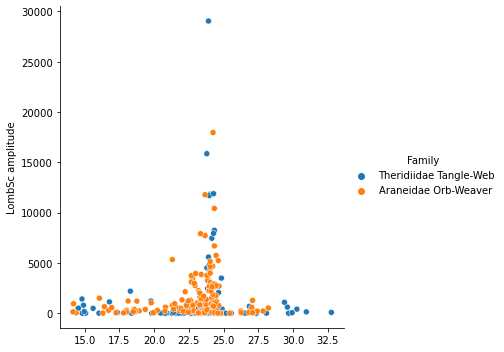

In [23]:
sns.relplot(x = dfi["LombSc period"].values, y = dfi["LombSc amplitude"], hue = 'Family', data = dfi)

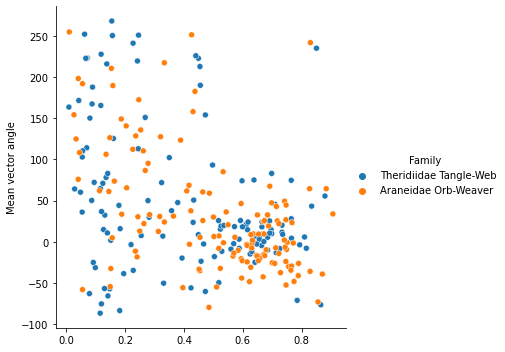

In [21]:
sns.relplot(x = dfi["Mean vector lengh"].values, y = dfi["Mean vector angle"], hue = 'Family', data = dfi)

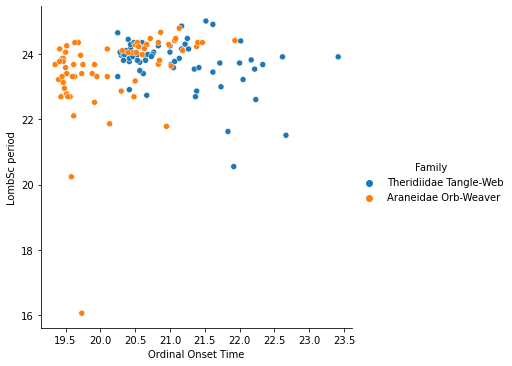

In [27]:
pdandot(dfi)

sns.relplot(x = dfpd["Ordinal Onset Time"], y = dfi["LombSc period"], hue = 'Family', data = dfi)

#### Conclusions

Have to check for significance. Onset Time seems like a promising measure. Between Family comparison shows Orb-weavers have an onset time earlier than tangle-webs. 